<a href="https://colab.research.google.com/github/sonahyoung/class2022Spring/blob/main/nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tokenization

여러 문장으로 된 string을 하나하나 단어수준으로 끊어서 가지고 있는 것, <단어 수준으로 끊는다>

list 안에다가 단어를 넣는것

nltk = natural language tool knit

natural language (ex. 사람의 언어, text) <-> artifical language (ex. 컴퓨터 language)



In [23]:
import nltk

In [25]:
# copy a file from github
import os
url = "https://raw.githubusercontent.com/hsnam95/class2022Spring/main/crime_punishment.txt"
os.system("curl " + url + " > crime_punishment.txt")  #이 부부늘 실행하면 왼쪽 메뉴 폴더에 crime_punishment.txt가 copy되어 있음

# read a text file in the server  #현재 서버에 들어가 있으면 이렇게 할 수 있음
file = open("crime_punishment.txt")
text = file.read().replace("\n", " ")    #모든 text를 string으로 가져왔음. 이걸 실행하면 모든 text라는 변수에 string으로 가져오는 거임.
file.close()

In [26]:
# or copy/pase text here   #read a text file in the server 말고 이렇게 그냥 할 수도 있음.
text = 'Here’s to the crazy ones, the misfits, the rebels, the troublemakers, the round pegs in the square holes. \
The ones who see things differently — they’re not fond of rules. \
You can quote them, disagree with them, glorify or vilify them, \
but the only thing you can’t do is ignore them because they change things. \
They push the human race forward, and while some may see them as the crazy ones, we see genius, \
because the ones who are crazy enough to think that they can change the world, are the ones who do.'

In [27]:
# write out a text file    #text라는 변수에 string이 위의 코드식과 같이 들어있다면, 우리가 이것을 파일로 output을 만들 수도 있음. tmp.text로 파일 자체를 write out할 수 있음. 
file = open("tmp.txt", "w")
file.write(text)
file.close()

In [ ]:
text.split()   #띄어쓰기를 기준으로 다 쪼개줌. list로 string을 다 쪼개서 하나하나 item으로 만들어줬음. 전형적인, 원시적인 tokenize
#단점은 쉼표나 마침표가 포함되어있음, punctuation도 쪼개고 싶다면 아래로!

In [ ]:
' '.join(text.split())   #split해놓은 것을 다시 join할 수도 있음. space를 가지고 list에 있는 token들을 결합시키라는 뜻

In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
words = word_tokenize(text)   #이렇게 하면 punctuation이 따로 token들로 잡혀져 있음
#이 부분의 단점은 우리는 punctuation이 필요하지 않음. punctuation을 완전히 없애고 싶으면 맨 마지막 코딩식처럼 해라.

In [ ]:
words

In [35]:
from nltk.tokenize import RegexpTokenizer   #regular expression based tokenizer
retokenize = RegexpTokenizer("[\w]+")
words = retokenize.tokenize(text)

In [ ]:
words  #여기 보면 아예 punctuation들이 빠져있음

### Normalization  
**Stemming** 어간 추출 대충의 패턴 규칙으로 어미를 잘라내는 것 (사전에 없는 어간 나올 수 있음)

-> 어미를 잘라내지만, 막 잘려서 사전에 없는 어간이 나올 수 있음.

**Lemmatization** 표제어(기본 사전형) 추출.

-> 잘라내는 것만 하는 게 아니라 원형으로 복귀를 해내는 거임.


normalization은 깨끗하게 하는 것, 동사나 명사에 활용이 되어있으면 분리를 해내는 등을 함

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
[stemmer.stem(w) for w in words]   #막 자르다 보니 실행해보면 crazi처럼 사전에 없는 단어가 나옴.

In [ ]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
[stemmer.stem(w) for w in words]   #여기도 마찬가지로 막 잘라서 사전에 없는 단어가 나옴.

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
[lemmatizer.lemmatize(w) for w in words]   #glorifi로 끝났던 거가 glorify로 제대로 된 단어로 나뉘어짐.

### Stopword

어떤 단어들 중에 너무 많이 쓰는 단어들 (대명사, 조동사들, 관사) -> 관심이 없음. 너무 자주 나오는 단어들은 분석에 쓸모가 없기 때문에 모아놓음

In [ ]:
from nltk.corpus import stopwords  
nltk.download('stopwords')
print(words)   #words는 여전히 regular expression 기반해서 잘랐던 거임.   #여기 words는 stopword가 있더라도 그냥 내버려둔거임.
words = [w for w in words if not w in stopwords.words('english')]   #words에서 하나하나씩 받아서 for loop로 검사받는거임. 단어가 stopwords.words('english')에 들어가 있지 않으면 취하라는 뜻임. = stopwords에 있는 것은 빼라는 뜻임
print(words)   #stopwords 뺀 것

### Collocation, Concordance

Collocation은 우리 말로 연어라고도 하는데, 같이 붙어있는 숙어 같은 것이 대표적인 연어임. take - care은 붙어나올 가능성이 높다.

Concordance는 예를 들어 한 소설이 있을 때, 특정 단어들의 용례들을 보여줌.

위에까지는 짧은 text를 가지고 작업했지만, collocation부터는 nltk라는 package 속에 담겨있는 소설을 다운받음.

In [ ]:
nltk.download('gutenberg')   #저작권이 지난, classic novel 이런 것들을 모아서 무료로 제공하는 것을 gutenberg project라고 함
text = nltk.corpus.gutenberg.raw('austen-emma.txt')  #소설 하나를 가져옴
words = retokenize.tokenize(text)

In [ ]:
type(text)  #모든 text들이 이 안에 string으로 다 되어 있는 거임.

In [ ]:
text[0:100]

In [ ]:
len(text)

In [ ]:
type(words)

In [ ]:
words  #list로 받아져있으면 그 list를 가지고 여러가지 다양한 분석을 할 수 있음.

In [ ]:
len(words)

In [ ]:
nltk.Text(words).collocations()  # default: (num=20, window_size=2)   #collocation은 두개가 연속해서 나오는 단어들
#대부분, 많은 경우 사람 이름임.

In [ ]:
nltk.Text(words).concordance('Emma', 79, 10)   #용례, emma라는 단어가 등장하는 앞뒤로의 context를 같이 보여줌. 10개를 뽑아옴. 79는 처음부터 세었을 때 캐릭터 숫자가 79인거임. 

In [ ]:
nltk.Text(words).dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])
#corpus 전체에서 등장인물들이 등장하는 순간이 어디인가를 보여줌.
#누가 주인공인지 그런걸 볼 수 있음.

In [ ]:
# Distributional similarity:    #분포상으로 유사한 것이 무엇인가.
# find other words which appear in the same contexts as the specified word; 
# list most similar words first.
nltk.Text(words).similar("Emma")   #Emma하고 비슷하게 나올 단어를 찾아봐라, 대부분 대명사로 나옴.

In [ ]:
# Find contexts where the specified words appear; list most frequent common contexts first.
nltk.Text(words).common_contexts(["Emma", "she"])   #세개를 넣어도 됨. 양쪽 단어를 공통으로 나타내는 곳을 보여줘라.
#실행해보면 _에 emma랑 she가 같이 나오는 곳임.

### Frequency distribution, Frequency plot

text processing, analysis에서 제일 중요한게 frequency임
어떤 단어가 많이 쓰였는지 그거를 보는 게 document에 대한 정의를 잘 내려줄 수 있음. document에 대한 특징을 잘 반영해줌.
ex) bat라는 단어가 많이 보이면 야구에 대한 이야기이구나 라는 것을 알 수 있음

In [ ]:
fd = nltk.FreqDist(words).most_common(20)
fd  #단어가 몇 번 나오는지 빈도수를 보여준다. 나오는 건 대부분 stopwords임

In [ ]:
nltk.Text(words).plot(20)   #위의 코딩식과 똑같지만 이렇게 plotting해서 볼 수도 있음

### Dictionary

사전을 통으로 불러올 수 있음

In [ ]:
nltk.download('words')
nltk.corpus.words.words('en')[-20:-1]  #en이라고 해서 영어 dictionary를 다운받음, 제일 마지막 20개를 보는 거임.


In [ ]:
len(nltk.corpus.words.words('en'))   #dictionary가 포함하고 있는 단어의 개수도 알 수 있음

### Extract information (pos tag, named entity)

pos tag는 품사임. 품사들의 약어나 설명은 아래 정리되어 있음. 품사를 자동으로 분석해 줌(natural language processing의 중요한 부분 중의 하나!)

given sentence, given paragraph에 대해서 pos tag, part of speech라고 해서 품사를 붙여줌. - 접속사, 관사, 명사, 소유격, 동사 등등이 있음.

#### **POS tag list**:

CC	coordinating conjunction \
CD	cardinal digit \
DT	determiner \
EX	existential there (like: "there is" ... think of it like "there exists") \
FW	foreign word \
IN	preposition/subordinating conjunction \
JJ	adjective	'big' \
JJR	adjective, comparative	'bigger' \
JJS	adjective, superlative	'biggest' \
LS	list marker	1) \
MD	modal	could, will \
NN	noun, singular 'desk' \
NNS	noun plural	'desks' \
NNP	proper noun, singular	'Harrison' \
NNPS	proper noun, plural	'Americans' \
PDT	predeterminer	'all the kids' \
POS	possessive ending	parent's \
PRP	personal pronoun	I, he, she \
PRP\$	possessive pronoun	my, his, hers \
RB	adverb	very, silently, \
RBR	adverb, comparative	better \
RBS	adverb, superlative	best \
RP	particle	give up \
TO	to	go 'to' the store. \
UH	interjection	errrrrrrrm \
VB	verb, base form	take \
VBD	verb, past tense	took \
VBG	verb, gerund/present participle	taking \
VBN	verb, past participle	taken \
VBP	verb, sing. present, non-3d	take \
VBZ	verb, 3rd person sing. present	takes \
WDT	wh-determiner	which \
WP	wh-pronoun	who, what \
WP\$	possessive wh-pronoun	whose \
WRB	wh-abverb	where, when \

In [69]:
sent = "I am Jhon from America and would like to go to Starbuck"
words = nltk.word_tokenize(sent)

In [ ]:
words   #tokenize를 먼저 한거임

In [ ]:
nltk.download('averaged_perceptron_tagger')
pos = nltk.pos_tag(words)   #words에서 나온 품사 적어라

In [ ]:
pos

In [ ]:
nltk.download('maxent_ne_chunker')
NE = nltk.ne_chunk(pos)
#named entity라고 해서 품사 말고도 아래 type에 대한 정보를 또 줄 수가 있음
# common Entity types: ORGANIZATION, PERSON, LOCATION, DATE, TIME, MONEY, and GPE (geo-political entity)

### Wordcloud

frequency를 기반으로 해서 visualizing해주는 거임. 어떤 text에 어떤 단어가 많이 나왔는지, 빈도별로 글자의 폰트를 달리해서 visualize해줌

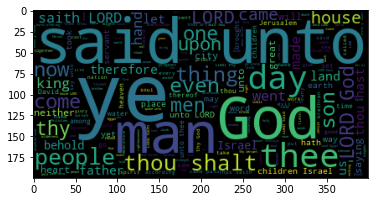

In [79]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = nltk.corpus.gutenberg.raw('bible-kjv.txt')   #text에는 string으로 다 담겨있을 거임.

wc = WordCloud().generate(text) 
plt.imshow(wc)  #많이 나오는 단어들은 폰트가 크다.

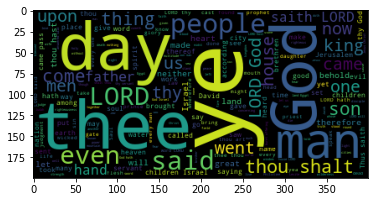

In [81]:
stopwords = set(STOPWORDS) 
stopwords.add('unto')  #nltk에서는 원래는 stopword가 다 정해져 있는데, 내가 이런 것처럼 추가도 할 수 있음
wc = WordCloud(stopwords = stopwords).generate(text)   #위랑은 조금 다른게, stopwords = stopwords가 추가되었음. 기존의 stopwords에다가 unto를 더해서 define하고 generate하면 unto 포함한 다른 stopwords가 많이 빠져있음.
plt.imshow(wc)

### Regular expression

regular expression은 어떤 규칙을 표현하는 거임. 어떤 text에 어떤 조작을 가하고 싶을때, 아니면 search를 하고 싶을때 규칙으로 해서 찾아내는 거임.

In [ ]:
import re

In [ ]:
re.search('a', 'abcdefa')

In [ ]:
re.findall('a', 'abcdefa')

In [ ]:
re.sub('a', 'b', 'abcdefa')

In [ ]:
'''       Basic Regular Expression Meta-Characters, Including Wildcards, Ranges and Closures

.	        Wildcard, matches any character
^abc	    Matches some pattern abc at the start of a string
abc$	    Matches some pattern abc at the end of a string
[abc]	    Matches one of a set of characters
[^abc]    Matches anything but a set of characters
[A-Z0-9]	Matches one of a range of characters
ed|ing|s	Matches one of the specified strings (disjunction)
*	        Zero or more of previous item, e.g. a*, [a-z]* (also known as Kleene Closure)
+	        One or more of previous item, e.g. a+, [a-z]+
?	        Zero or one of the previous item (i.e. optional), e.g. a?, [a-z]?
{n}	      Exactly n repeats where n is a non-negative integer
{n,}	    At least n repeats
{,n}	    No more than n repeats
{m,n}	    At least m and no more than n repeats
a(b|c)+	  Parentheses that indicate the scope of the operators
(...)     Matches whatever regular expression is inside the parentheses
\d
Matches any decimal digit; this is equivalent to the class [0-9].
\D
Matches any non-digit character; this is equivalent to the class [^0-9].
\s
Matches any whitespace character; this is equivalent to the class [ \t\n\r\f\v].
\S
Matches any non-whitespace character; this is equivalent to the class [^ \t\n\r\f\v].
\w
Matches any alphanumeric character; this is equivalent to the class [a-zA-Z0-9_].
\W
Matches any non-alphanumeric character; this is equivalent to the class [^a-zA-Z0-9_].

'''

In [ ]:
engdict = nltk.corpus.words.words('en')

result = [w for w in engdict if re.search('ed$', w)]
# result = [w for w in engdict if re.search('^..j..t..$', w)]
# result = [w for w in engdict if re.search('^[ghi][mno][jlk][def]$', w)]
# result = [w for w in engdict if re.search('^[ah]+$', w)][:10]
print(result[:10])

In [ ]:
nltk.download('treebank')
wsj = nltk.corpus.treebank.words()

result = [w for w in wsj if re.search('(ed|ing)$', w)]
# result = [w for w in wsj if re.search('^[0-9]+\.[0-9]+$', w)]
# result = [w for w in wsj if re.search('^[A-Z]+\$$', w)]
# result = [w for w in wsj if re.search('^[0-9]{4}$', w)]
# result = [w for w in wsj if re.search('^[0-9]+-[a-z]{3,5}$', w)]
# result = [w for w in wsj if re.search('^[a-z]{5,}-[a-z]{2,3}-[a-z]{,6}$', w)]

result = sorted(set(result))
print(result[:10])

In [ ]:
import os
url = "https://raw.githubusercontent.com/hsnam95/my/main/friends_season01_script.txt"
os.system("curl " + url + " > friends_season01_script.txt")

# read a text file in the server
file = open("friends_season01_script.txt")
text = file.read()
file.close()
text

In [ ]:
pattern = '(?<=: ).+(?=[\.|\?|\!])'
sent = re.findall(pattern, text)
sent
text = '\n'.join(sent)

In [ ]:
# write out a text file
file = open("tmp.txt", "w")
file.write(text)
file.close()